#

Para provar que $f(t)$ tem ao menos uma raiz real, vamos usar o Teorema de Bolzano. Esse teorema garante, para uma função $f: \mathbb{R} \rightarrow \mathbb{R}$ **contínua** e **monótona** em um intervalo $[a, b] \subset \mathbb{R}$, que se $f(a)f(b) < 0$ então existe ao menos uma raiz $r \in (a, b)$ considerando $a < b$. 
    
    
Como a função $\cos{x}$ e as funções polinomiais são contínuas, $f(x)$ é contínua para todo valor de $x$ exceto $x = -5$ (para o qual o denominador de $(x+3)/(x+5)$ seria nulo). Isso significa que devemos escolher um intervalo $[a, b]$ que não inclua $5$.

Para encontrar esse intervalo, fazer um gráfico de $f(t)$ por $t$ ajuda muito!

In [1]:
import Base
using Plots
pyplot()
using LaTeXStrings

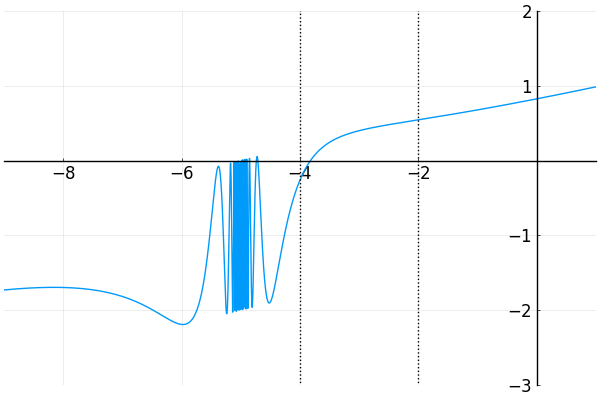

In [2]:
x =  LinRange(-10, 5, 10000)
f(x) = cos.((x.+3)./(x.+5)) .+ (x./5)
plot(x, f(x),  framestyle = :origin, legend = false, tickfontsize = 12,
     xlims = (-9,1), ylims = (-3, 2))
vline!([-4. -2], line = (:black, :dot))

No gráfico acima, aparenta que:
    
> (I) A função cruza o eixo $x$ no intervalo $[-4, -2]$, então $f(-4)f(-2) < 0$
>
> (II) A função é monotonamente crescente no intervalo $[-4, -2]$, então $\forall t \in [-4, -2], f'(t) > 0$ 
        
Podemos confirmar (I) programaticamente:

In [3]:
a = -4
b = -2
f(a)f(b) < 0

true

Para confirmar (II) devemos calcular a derivada de $f(x)$ e verificar se ela é sempre positiva no intervalo que escolhemos. Usando regras de derivação chegamos a seguinte expressão para $f'(x)$:

$$
f'(x) = \frac{1}{5} - \frac{2 \sin{\left(\frac{x+3}{x+5}\right)}}{(x+5)^2}
$$

Por mais que um gráfico não prove rigorosamente coisa alguma, determinar o valor máximo de funções em um intervalo que não contém máximos locais é algo que não aprendemos nas disciplinas de cálculo e (ainda) não aprendemos em MS211. Sendo assim, podemos observar no gráfico de $f'(x)$ que ela é positiva em todo o intervalo dado:

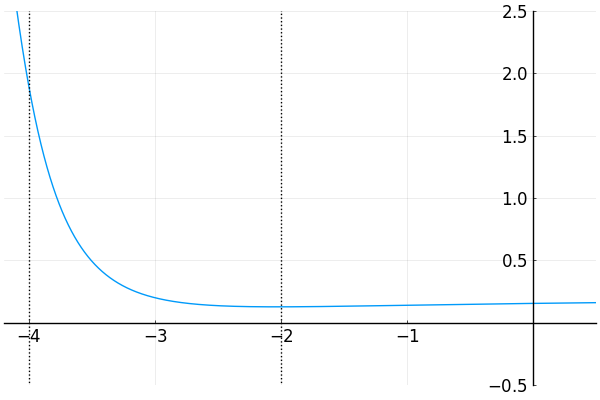

In [4]:
x =  LinRange(-10, 5, 10000)
df(x) = (1/5) .- 2*sin.((x.+3)./(x.+5))./(x.+5).^2
plot(x, df(x),framestyle = :origin, legend = false, tickfontsize = 12,
     xlims = (-4.2,0.5), ylims = (-0.5, 2.5))
vline!([-4. -2], line = (:black, :dot))

Como podemos ver no gráfico acima, a $f'(x)$ é sempre positiva no intervalo escolhido então (II) está confirmado e terminamos de provar que $f(x)$ tem ao menos uma raiz real.

#

O caso mais simples para determinar o número de raízes de $f(x)$ seria se $f(x)$ fosse monotonamente crescente ou decrescente e conseguíssemos encontrar valores $a, b \in \mathbb{R}$ tal que $f(a)f(b) < 0$. Para isso, precisamos verificar se $f'(x)$ é sempre positiva ou sempre negativa avaliando-a em nos pontos $x_c$ para os quais $f''(x_{c}) = 0$.

Felizmente, um gráfico de $f(x)$ mostra que estamos provavelmente lidando com esse caso mais simples:

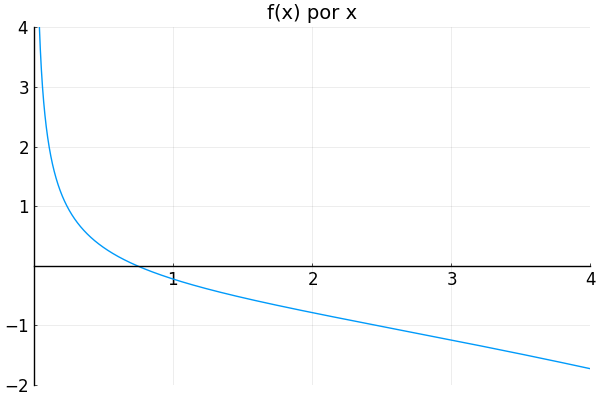

In [5]:
# só precisamos fazer o gráfico para x não negativo, pois não existe raiz quadrada real de x < 0
# mesmo que f não exista em 0, Julia não se incomoda mesmo se o incluirmos no intervalo do gráfico

x =  LinRange(0, 5, 10000)
f(x) = x.^(-1/2) - ℯ.^(x./5)
plot(x, f(x),  framestyle = :origin, legend = false, tickfontsize = 12, title = "f(x) por x",
     xlims = (0,4), ylims = (-2, 4))

O gráfico acima nos dá candidatos para $a$ e $b$ tal que $f(a)f(b) < 0$, por exemplo $a = 0$ e $b = 2$. Veja que exemplo, de fato, funciona:

In [6]:
a = 0 
b = 2
f(a)f(b) < 0

true

Agora só falta verificar se $f(x)$ é monótona! Para isso vamos calcular e plotar suas derivadas:

$$
f'(x) = \frac{-x^{\frac{-3}{2}}}{2} - \frac{e^{\frac{x}{5}}}{5}
$$

$$
f''(x) = \frac{3 x^{\frac{-5}{2}}}{4} - \frac{e^{\frac{x}{5}}}{25}
$$

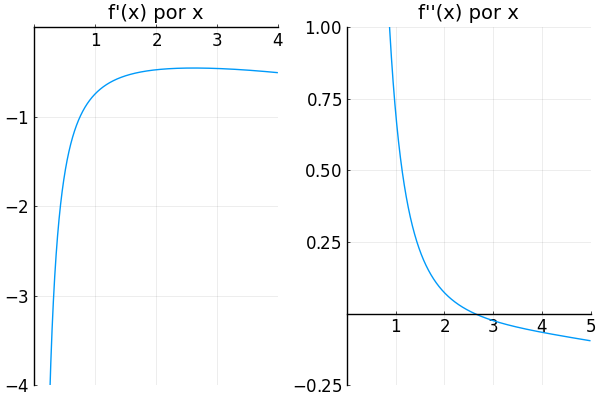

In [7]:
# derivada primeira
df(x) = (-1/2)x.^(-3/2) - (1/5)ℯ.^(x./5)
plot1 = plot(x, df(x),  framestyle = :origin, legend = false, tickfontsize = 12, title = "f'(x) por x",
             xlims = (0,4), ylims = (-4, 0))

#derivada segunda
ddf(x) = (3/4)x.^(-5/2) - (1/25)ℯ.^(x./5)
plot2 = plot(x, ddf(x),  framestyle = :origin, legend = false, tickfontsize = 12, title = "f''(x) por x",
             xlims = (0,5), ylims = (-1/4, 1))

plot(plot1, plot2)

Pelo máximo local evidente no gráfico de $f'(x)$ já podemos suspeitar que a derivada de $f$ é sempre negativa, ou seja, $f$ seria monotonamente decrescente. Isso é corroborado pela aparente raíz de $f''(x)$ próximo ao lugar onde ocorre o máximo local de $f'(x)$.

Para mostrar que essa raíz de $f''(x)$ é o único ponto de crítico de $f'(x)$ teríamos que mostrar que a solução para a equação

$$
\frac{3 x^{\frac{-5}{2}}}{4} = \frac{e^{\frac{x}{5}}}{25}
$$

existe e é única, o que seria bem difícil. Por isso, vou novamente me limitar a mostrar uma "prova" visual dessa conjectura e, em seguida, argumentar sua validez:

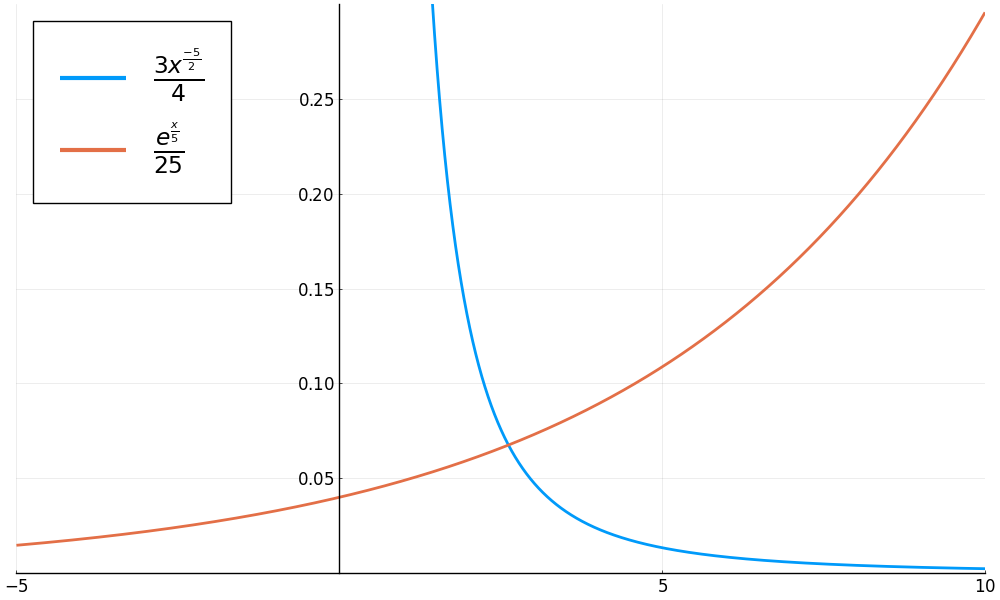

In [8]:
# lado esquerdo da equação
x =  LinRange(0, 10, 10000)
E(x) = (3/4)x.^(-5/2)
plot(x, E(x),  framestyle = :origin, tickfontsize = 12, legend = :topleft, legendfontsize=24, lw = 2,
     label = L"\frac{3 x^{\frac{-5}{2}}}{4}", xlims = (-5,10), ylims = (0, 0.3), size = (1000, 600))

# lado direito da equação
x =  LinRange(-5, 10, 10000)
D(x) = (1/25)ℯ.^(x./5)
plot!(x, D(x), lw = 2, label = L"\frac{e^{\frac{x}{5}}}{25}", xlims = (-5,10), ylims = (0, 0.3))

A função $E(x) = \frac{3 x^{\frac{-5}{2}}}{4}$ (em azul) tende a sempre diminuir pois $x$ está sendo elevado a um número negativo, enquanto a função $D(x) = \frac{e^{\frac{x}{5}}}{25}$ (em laranja) tende a sempre aumentar pois é uma exponencial. Por isso, é razoável dizer que elas só passem por cada altura uma única vez incluindo aquela onde elas se cruzam.

#

Vamos utilzar o Teorema de Bolzano para encontrar um intervalo $[a, b]$ que contenha uma raiz de $f(x)$. Para encontrar esse intervalo, convém fazer um gráfico de $f(x)$.

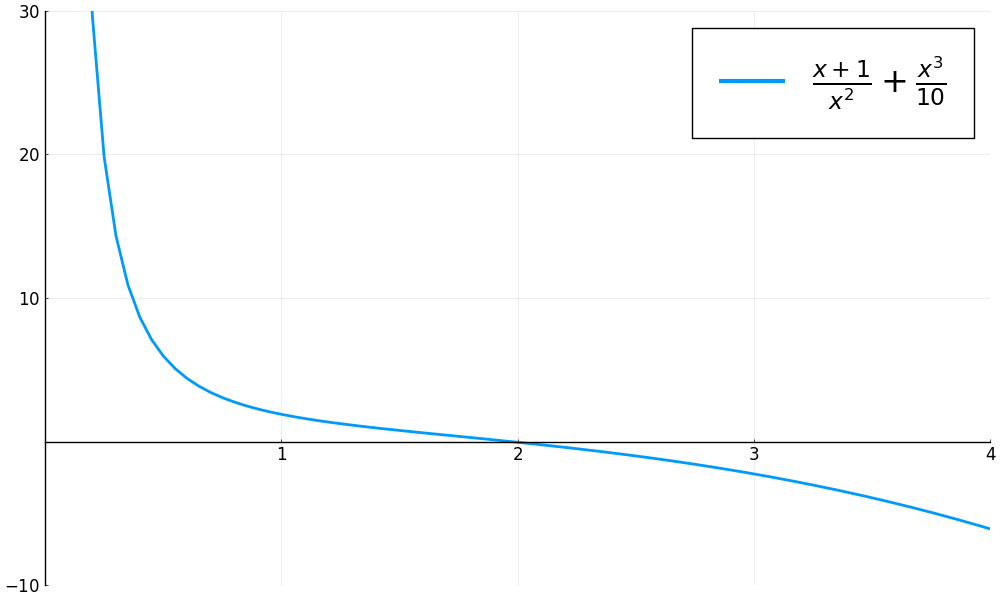

In [9]:
x =  LinRange(0, 10, 200)
f(x) = ((x .+ 1)./(x .^ 2)) .- (x .^ 3)./10
plot(x, f(x), framestyle = :origin, tickfontsize = 12, legend = :topright, legendfontsize=24, lw = 2,
     label = L"\frac{x+1}{x^2} + \frac{x^3}{10}", xlims = (0,4), ylims = (-10, 30), size = (1000, 600))

Ao que parece, o intervalo $[1, 3]$ contém uma raiz de $f(x)$. Vamos verificar se isso realmente ocorre: 

In [10]:
a = 1
b = 3
f(a)f(b) < 0

true

Agora, vamos comparar dois critérios de parada para o método da bissecção

> (I) $(b - a) \rightarrow \epsilon$ 
> 
> (II) $f(\frac{a+b}{2}) \rightarrow \epsilon$

In [11]:
function bisseccao_x(f, a, b, epsilon=1.0e-4)
    # condição de parada: b proximo de a
    iter = 1
    while b - a >= epsilon
        medio = (a + b)/2.0
        println(iter, ": ", medio)
        if f(medio)*f(a) > 0.0
            a = medio
        else
            b = medio
        end
        iter += 1
    end
    
    medio = (a + b)/2.0
    println(iter, ": ", medio)
    return medio
end

bisseccao_x (generic function with 2 methods)

In [12]:
function bisseccao_y(f, a, b, epsilon=1.0e-4)
    # condição de parada: f(medio) próximo de 0
    iter = 1
    while f((a + b)/2.0) >= epsilon
        medio = (a + b)/2.0
        println(iter, ": ", medio)
        if f(medio)*f(a) > 0.0
            a = medio
        else
            b = medio
        end
        iter += 1
    end
    
    medio = (a + b)/2.0
    println(iter, ": ", medio)
    return medio
end

bisseccao_y (generic function with 2 methods)

In [13]:
bisseccao_x(f, a, b)

1: 2.0
2: 1.5
3: 1.75
4: 1.875
5: 1.9375
6: 1.96875
7: 1.984375
8: 1.9765625
9: 1.97265625
10: 1.970703125
11: 1.9697265625
12: 1.97021484375
13: 1.970458984375
14: 1.9703369140625
15: 1.97039794921875
16: 1.970428466796875


1.970428466796875

In [14]:
bisseccao_y(f, a, b)

1: 2.0


2.0

Sabendo que a resposta real é 1.9704449265763137168 (obrigado Wolfram Alpha), fica claro que a implementação do método da bissecção utilizando o critério de parada (I) chegou muito mais perto da solução verdadeira, com cinco dígitos corretos, do que a utilizando o (II), com nenhum dígito correto. Vale mencionar que a primeira teve dezesseis iterações enquanto a segunda teve apenas uma.

#

No Método de Newton, a $k$-ésima iteração é dada por:

$$
x_k = x_{k-1} - \frac{f(x_{k-1})}{f'(x_{k-1})}
$$

Para usarmos esse método para calcular a raíz cúbica de 10, devemos definir $f(x)$ tal que sua raiz seja o valor que buscamos. Assim $f(x) = x^3 - 10$ e $f'(x) = 3x^2$, então a $k$-ésima iteração é dada por:

$$
x_k = x_{k-1} - \frac{x_{k-1}^3 - 10}{3 x_{k-1}^2}
$$

Agora podemos implementar o algoritmo em Julia:

In [18]:
xk(xp) = xp - (xp^3 - 10)/(3*xp^2)

xp = 3 # estimativa inicial
for i in 1:4
    result = xk(xp)
    print(i,": ", result, "\n")
    xp = result
end

1: 2.3703703703703702
2: 2.173508632330247
3: 2.154601586556419
4: 2.154434702959439


In [26]:
# Comparando nossa estimativa com o valor "real" da raiz cúbica de 10
print("Valor estimado = ", xp, "\n")
print("Valor \"real\"   = ", 10^(1/3), "\n")

Valor estimado = 2.154434702959439
Valor "real"   = 2.154434690031884


Em apenas quatro iterações chegamos a 7 casas decimais corretas.

#

Ao aplicar o Método de Newton para resolver a equação $x^3 = 0$, partindo da estimativa $x_1 = 1$, as duas próximas iterações serão:

$$
x_{2} = x_{1} - \frac{x_1^3}{3x_1^2} = 1 - \frac{1^3}{3\cdot 1^2} = 1 - \frac{1}{3} = \frac{2}{3}
$$

$$
x_{3} = x_{2} - \frac{x_2^3}{3x_2^2} = \frac{2}{3} - \frac{\frac{2}{3}^3}{3\cdot \frac{2}{3}^2} = \frac{2}{3} - \frac{\frac{8}{27}}{3\cdot \frac{4}{9}} = \frac{2}{3} - \frac{\frac{8}{27}}{\frac{4}{3}}  = \frac{48}{108} = \frac{4}{9}
$$

Pelo Teorema da Convergência Quadrática de Newton, seria esperado que $|x_{k+1} - x^*| \le M|x_k - x^*|^2$ então, sabendo que a solução "verdadeira" de $x^3 = 0 $ é $x^* = 0$, temos:

$$
|x_2 - 0| \le M|x_1 - 0|^2 \Rightarrow \frac{2}{3} \le M~1^2
$$

Ou seja, poderíamos escolher $M = \frac{2}{3}$. Assim, na próxima iteração teríamos:

$$
|x_3 - 0| \le \frac{2}{3}|x_2 - 0|^2 \Rightarrow \frac{4}{9} \le \frac{2}{3} \left(\frac{2}{3}\right)^2 \Rightarrow \frac{4}{9} \le \frac{2}{3}\left(\frac{4}{9}\right)~~~~\text{ABSURDO!}
$$

Pode parecer que chegamos a uma contradição, mas na verdade usamos o Teorema da Convergência Quadrática sem cumprir todas as suas condições! Ele só é válido quando o Método de Newton está bem definido, isto é, quando $f'$ avaliada na raiz de $f$ não é nula:

$$
f'(x^*) \ne 0
$$

Avaliando a derivada de $x^3$ em $x = 0$, fica claro que esse claramente é o caso:

$$
f'(x^*) = f'(0) = 3 \times 0^2 = 0
$$

Por isso, não houve contradição alguma!